# Project02 - Investigate a TMDb Movie dataset

Name : Sidhika Mahadik

## Introduction

> this dataset contains information about 10k movie collected from The Movie Database (TMDb),including user ratings and revenue,cast,release year It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

>there are about 21 columns and 10866 rows are present.

**Questions that can analyzed from this dataset**

- Movies with largest and lowest budget
- Who are the directors contributing to high revenue movies by considering the revenue factor?
- in which year most of the movies are released
- movies with most and least earned revenue
- average runtime of all the movies
- Movies with longest and shortest runtime values
- what kind of movie genres are made the most
- Average Revenue earned by the movies
- Average duration of Movie

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import csv
from datetime import datetime


**After creating a questions and importing the necessary libraries that can be analyzed from the dataset now its to read that read that dataset and perfrorm some wrangling on that dataset.**

## Data Wrangling

In [3]:
# load the dataset using pandas 
df = pd.read_csv('tmdb-movies.csv')

#print some few lines of data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

### Observations

- No unit of currency is mentioned in the dataset. So for my analysis I will take it as dollar as it is the most used international currency.

- vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**let some get more intuition about our dataset.**

In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning First Step

**From above datatypes we can see that release_date is object i.e in string format We have to convert release_date column to datetime**

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

we can test it by rechecking the data types of columns


In [9]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

**Let's get release month**

In [10]:
df['release_month'] = df['release_date'].dt.month

### Data Cleaning

### From the observation we can see that there are lots of missing values, unused datacolumns, and many more unused data is present we need to clean it

- Removing the duplicacy in the rows(if any).
- Replacing zero with NAN in runtime column.
- Changing format of budget and revenue column.
- We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
- Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries

**1)Remocing Duplicate values if any**

In [11]:
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 22 no.of columns in it.


**so there are originally 10865 rows are present but now it reduces to 10864 because there are some rows with duplicated values.**

**2)Replacing zero with NAN in runtime column.**

In [12]:
#replacing 0 with NaN of runtime column in the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)

**3)Changing format of budget and revenue column.**

In [13]:
#this is the current format of data
#printing the data type of the data set
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
release_month                    int64
dtype: object

In [14]:
newchange_type=['budget', 'revenue']
#changing data type
df[newchange_type]=df[newchange_type].applymap(np.int64)
#printing the changed information
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
release_month                    int64
dtype: object

**4) Deleting Unused Columns**

with the help of pandas drop method we can delete the column.

In [15]:
#creating a list of columb to be deleted
unused_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
df = df.drop(unused_col,1)

#previewing the new dataset
df.head(4)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,release_month
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,6
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,5
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015,3
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,12


In [16]:
df.shape # for testing purpose

(10865, 11)

**5)Removing zeros from budget and the revenue columns.**

In [17]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

rows, col = df.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


**Our dataset contains lots of columns separted by '|' character. For better analysis I have decided to split them up.**

this i am done only on genres similarly we can done for others as i feel this is sufficient for the analysis.

In [18]:
def separate(data):
    return data.str[0:].str.split('|',expand = True)
genres = separate(df['genres'])

cast = separate(df['cast'])
genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [19]:
df.shape

(3854, 11)

In [20]:
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
release_month              int64
dtype: object

So.here we complete our Data cleaning Process.

## Exploratory Data Analysis

**Question01 : Movies with largest and lowest budgets**

In [21]:
import pprint
#defining the function
def cal(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info
# we will call the same function **calculate(column)** again for this analysis
cal('budget')

,2244,2618
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


Column with id 2244 shows the largest budget i.e 425000000 dollar.

Whereas the column with id 2618 shows the smallest budget i.e 1 dollar

**Question02 : Who are the directors contributing to high revenue movies by considering the revenue factor?**

In [22]:
df.groupby('director').sum().sort_values(by = 'revenue',ascending = False)['revenue'][0:10]

director
Steven Spielberg     9.018564e+09
Peter Jackson        6.523245e+09
James Cameron        5.841895e+09
Michael Bay          4.917208e+09
Christopher Nolan    4.167549e+09
David Yates          4.154296e+09
Robert Zemeckis      3.869691e+09
Chris Columbus       3.725632e+09
Tim Burton           3.665415e+09
Ridley Scott         3.584431e+09
Name: revenue, dtype: float64

**Question03 : in which year most of the movies are released**

In [23]:
df.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'tagline',
       'runtime', 'genres', 'release_date', 'release_year', 'release_month'],
      dtype='object')

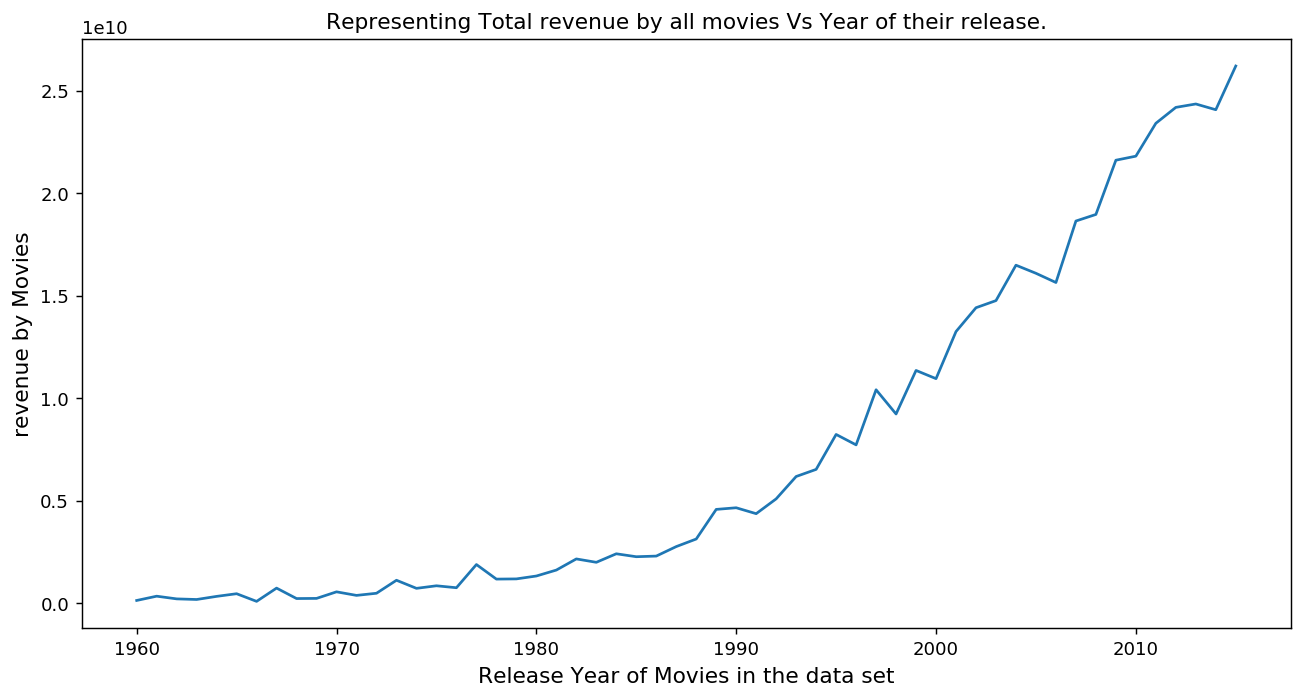

In [50]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['revenue'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130,)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('revenue by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total revenue by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [27]:
profits_year.idxmax()

2015

**So, from our analysis we can conclude that the most of the movies are released in year 2015.**

**Question04 :movies with most and least earned revenue**

In [28]:
# we will call the same function **cal(column)** again for this analysis
cal('revenue')

,1386,5067
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


Column with id 1386 shows the largest revenue earned i.e 2781505847 dollar.

Whereas the column with id 5067 shows the smallest revenue earned i.e 2 dollar

**Question05 : average runtime of all the movies**

In [29]:
# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()

In [30]:
#calling above function
avg_fun('runtime')

109.22029060716139

So the average runtime a movie is 109 minutes. Lets analyse it in a visual form i.e. by graphical approach.

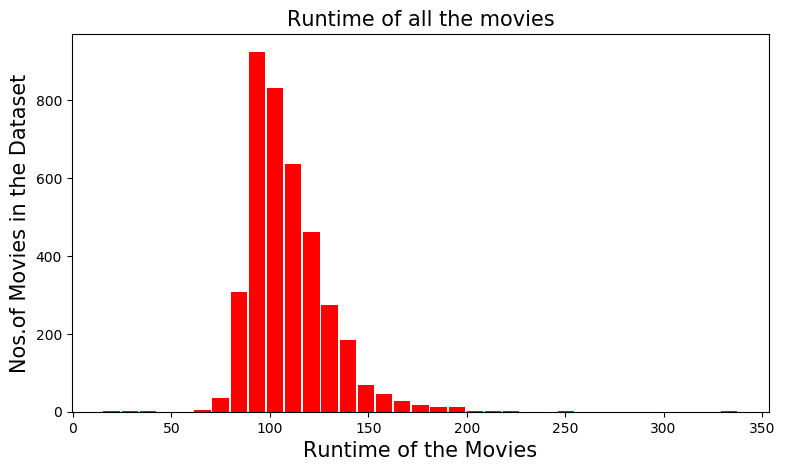

In [31]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35,color = 'r')
#displays the plot
plt.show()

Now, we use seaborn library for another insight for the graph. 

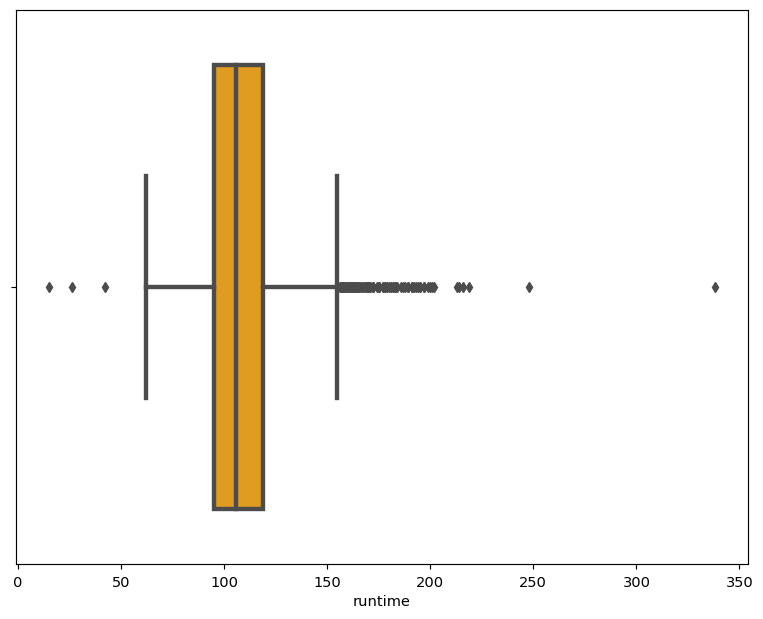

In [36]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 3,color='orange')
#diplaying the plot
plt.show()

In [37]:
#getting specific runtime 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

By looking at both the plot and calculations, we can conclude that..

- 25% of movies have a runtime of less than 95 minutes
- 50% of movies have a runtime of less than 109 minutes. (median)
- 75% of movies have a runtime of less than 119 minutes

**Question06 : Movies with longest and shortest runtime values**

In [38]:
# we will call the same function **cal(column)** again for this analysis
cal('runtime')

,2107,5162
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


Column with id 2107 shows the longest runtime i.e 338 minutes.

Whereas the column with id 5162 shows the shortest runtime i.e 15 minutes

**Question07 : What kind of movie genres are made the most?**

In [39]:
df['genres'].value_counts()

Drama                                      245
Comedy                                     233
Drama|Romance                              107
Comedy|Romance                             104
Comedy|Drama|Romance                        91
                                          ... 
Drama|Crime|Music                            1
Romance|Comedy|Crime|Fantasy                 1
Comedy|Horror|Music|Science Fiction          1
Action|Fantasy|Science Fiction|Thriller      1
Action|Thriller|Music                        1
Name: genres, Length: 1053, dtype: int64

As we can see Drama has the highest genres

**Question08 : Average Revenue earned by the movies**

In [40]:
def profit_avg(column):
    return df[column].mean()
# calling the above function for revenue
profit_avg('revenue')

107686616.09807992

So, the movies have average revenue of 108 million dollar.

**Question09 : Average duration of Movie**

In [41]:
# calling the above function for 
profit_avg('runtime')

109.22029060716139

so average duration is about 109 minutes.

## Conclusion

We all know some intresting facts about our data Movies dataset. For a movie to be in a successfull criteria 

- Average duration of the movie must be 113 minutes
- Genre must be : Action, Adventure, Thriller, Comedy, Drama. and Drama is most popular genres 
- Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
- By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.

**Limitation**

As we do not that the dataset which is given to us is not completely up to date. so the analysis is done on the the dataset which is created in the past. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.
